In [10]:
import tensorflow as tf
import numpy as np

In [9]:
x = tf.random.normal([1,4,4,1], 0, 1, tf.float32)


print(x.shape)

y = tf.keras.layers.MaxPooling2D((2, 2))(x)
y2 = tf.keras.layers.MaxPooling2D(2, 2)(x)

print(y)
print(y2)

(1, 4, 4, 1)
tf.Tensor(
[[[[ 0.80348307]
   [ 0.04677792]]

  [[-0.07759151]
   [ 1.2092121 ]]]], shape=(1, 2, 2, 1), dtype=float32)
tf.Tensor(
[[[[ 0.80348307]
   [ 0.04677792]]

  [[-0.07759151]
   [ 1.2092121 ]]]], shape=(1, 2, 2, 1), dtype=float32)


In [10]:
import tensorflow as tf
import numpy as np
from layers import ReshapeTensor, ExpandDimensions

tf.random.set_seed(1234)
inputs = tf.random.normal([10,8,8,2048],seed=1234)



depth = 256
atrous_rates = (1,2,3)
kernel_size = 3
stride = 1
rate = 1

depth_padding = 'same'

inputs_size = tf.shape(inputs)[1:3]

conv_1x1 = tf.keras.layers.Conv2D(depth, 1, strides=1, padding=depth_padding, dilation_rate=1, use_bias = False)(inputs)
conv_3x3_1 = tf.keras.layers.Conv2D(depth, 3, strides=1, padding=depth_padding, dilation_rate=atrous_rates[0], use_bias = False)(inputs)
conv_3x3_2 = tf.keras.layers.Conv2D(depth, 3, strides=1, padding=depth_padding, dilation_rate=atrous_rates[1], use_bias = False)(inputs)
conv_3x3_3 = tf.keras.layers.Conv2D(depth, 3, strides=1, padding=depth_padding, dilation_rate=atrous_rates[2], use_bias = False)(inputs)

print(np.shape(inputs))
# global average pooling


image_level_features = tf.keras.layers.GlobalAveragePooling2D(keepdims=True)(inputs)
print(np.shape(image_level_features))

image_level_features = tf.keras.layers.Conv2D(depth, 1, strides=1)(image_level_features)
        
#bilinearly upsample features
image_level_features = ReshapeTensor(inputs_size)(image_level_features)

print(np.shape(image_level_features))

net = tf.keras.layers.Concatenate(axis=3)([conv_1x1, conv_3x3_1, conv_3x3_2, conv_3x3_3, image_level_features])        
print(net.shape)
net = tf.keras.layers.Conv2D(depth, 1, strides=1)(net)
print(net.shape)

output = net

print(inputs[0][0][0][0:10])
print(output[0][0][0])
 

(10, 8, 8, 2048)
(10, 1, 1, 2048)
(10, 8, 8, 256)
(10, 8, 8, 1280)
(10, 8, 8, 256)
tf.Tensor(
[-0.12297685 -0.76935077 -0.13165176  0.08304895 -3.0015008   0.7919887
  1.4807634  -1.4072733  -0.77743167 -1.3099809 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 1.01557755e+00  2.77576119e-01  2.32387161e+00 -6.69267774e-01
 -3.01511079e-01  4.82755303e-01  1.00800788e+00  5.95542908e-01
 -7.94963121e-01 -4.08913136e-01 -4.12122399e-01  2.10382605e+00
  7.45716870e-01 -2.05426157e-01  5.38080513e-01  2.02899170e+00
 -2.07439518e+00 -8.03793907e-01 -1.05553043e+00 -6.24145329e-01
 -1.87417698e+00  2.05340052e+00  2.34103918e+00 -2.52195597e-01
  4.84044790e-01  6.14168681e-03 -1.27083921e+00  2.02162147e+00
  2.33929348e+00  8.63251805e-01 -1.07289374e+00 -8.27126086e-01
 -9.95274365e-01  5.09066105e-01  8.86643708e-01 -5.58950938e-02
 -1.42951465e+00  5.23759723e-01 -1.09214818e+00 -1.07738090e+00
  1.03083789e+00  8.63634795e-02 -1.23181403e+00  1.42467785e+00
  8.46326590e-01  2.37477636e

In [54]:
import tensorflow as tf

logits = [[4.0, 2.0, 1.0], [0.0, 5.0, 1.0]]
labels = [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0]]
result = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

print(result)

tf.Tensor(0.097295485, shape=(), dtype=float32)


In [55]:
import tensorflow as tf

logits = [[4.0, 2.0, 1.0], [0.0, 5.0, 1.0]]
labels = [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0]]
result = tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)(labels,logits)

print(result)

tf.Tensor(0.097295485, shape=(), dtype=float32)


In [21]:
x = np.random.random_sample((1, 2, 2))
print(x.shape)
print(x)
print(np.shape(x)[1])

#y = np.reshape(x,(2,2))
#print(y.shape)
#print(y)

x1 = np.concatenate(x, axis=0)
print(x1.shape)
print(x1)

(1, 2, 2)
[[[0.15929904 0.79884429]
  [0.48919627 0.44281906]]]
2
(2, 2)
[[0.15929904 0.79884429]
 [0.48919627 0.44281906]]


In [94]:
from Networks import *
from layers import GradientReversalLayer

inputs = tf.random.normal(shape=(32, 8, 8, 256))

fc = Domain_Regressor_FullyConnected(1024,2)

x,logits = fc(inputs)

print(tf.shape(x))
print(tf.shape(logits))

#print(inputs.shape[3])

num_filters = inputs.shape[3]

print("#######################################")

#256, 128, 64
#for i in range(3): 
#    print(i)    
#    print(num_filters/(2**i))

conv = Domain_Regressor_Convolutional(2)


conv.summary()

grad = GradientReversalLayer()([inputs,0.037])

print(tf.shape(grad))

x1,logits1 = conv(grad)

print(tf.shape(x1))
print(tf.shape(logits1)[3])

#print(logits1)


tf.Tensor([32  2], shape=(2,), dtype=int32)
tf.Tensor([32  2], shape=(2,), dtype=int32)
#######################################


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [93]:
from Networks import *
from layers import GradientReversalLayer

inputs = tf.random.normal(shape=(2, 4, 4, 2))

print(inputs)

grad = GradientReversalLayer()([inputs,0.037])

print(grad)

tf.Tensor(
[[[[ 0.70936286  0.19106193]
   [-0.14148995 -0.86487156]
   [ 0.00436472 -0.24014476]
   [ 0.30503157 -1.294186  ]]

  [[-0.963309   -0.25598574]
   [ 0.73387724 -1.9983513 ]
   [-0.92183936  0.43104553]
   [ 0.07676414  0.00497397]]

  [[ 2.1945407  -0.00639255]
   [ 0.33226424  1.7936802 ]
   [-0.8062077   0.24771525]
   [ 0.29570708  1.2209939 ]]

  [[ 0.1743099  -0.3744971 ]
   [-0.32156888  0.6944017 ]
   [-0.40737057 -1.2838    ]
   [ 0.7491835   0.9780987 ]]]


 [[[-1.2058235  -0.36863866]
   [ 1.8411677  -0.1519867 ]
   [ 0.20310535 -0.06209443]
   [ 0.2263793  -1.6121606 ]]

  [[ 0.11472436  1.4253123 ]
   [ 1.1035818   0.4909932 ]
   [ 0.91452783  0.08028387]
   [ 0.46495062  0.24182716]]

  [[-1.9747303  -1.0934762 ]
   [-1.7341897   0.65822434]
   [-0.17610936 -1.7028635 ]
   [-0.9721943   0.30758366]]

  [[-1.1341666   1.3776942 ]
   [ 0.38876748  0.20358185]
   [ 0.6469661   1.6811141 ]
   [-1.304598    1.8566558 ]]]], shape=(2, 4, 4, 2), dtype=float32)
tf.Ten

In [112]:
from tensorflow import keras

inputs = keras.Input(shape=(4, 4, 3))
processed = keras.layers.RandomCrop(width=32, height=32)(inputs)
conv = keras.layers.Conv2D(filters=2, kernel_size=3)(processed)
pooling = keras.layers.GlobalAveragePooling2D()(conv)
feature = keras.layers.Dense(10)(pooling)

full_model = keras.Model(inputs, feature)
backbone = keras.Model(processed, conv)
activations = keras.Model(conv, feature)
logits = keras.Model(inputs, [feature,pooling])

#print(pooling.shape)
print(logits.layers[-1].output.shape)



(None, 10)


In [90]:
for e in range(100):
    p = float(e) / 100
    print("Percentage of epochs: " + str(p))
    warmup = 1
    if e >= warmup:
        l = 2. / (1. + np.exp(-2.5 * p)) - 1
    else:
        l = 0
    print("lambda_p: " + str(l))

Percentage of epochs: 0.0
lambda_p: 0
Percentage of epochs: 0.01
lambda_p: 0.012499348999020832
Percentage of epochs: 0.02
lambda_p: 0.024994792968420665
Percentage of epochs: 0.03
lambda_p: 0.037482431757070334
Percentage of epochs: 0.04
lambda_p: 0.049958374957880025
Percentage of epochs: 0.05
lambda_p: 0.06241874674751258
Percentage of epochs: 0.06
lambda_p: 0.0748596906874992
Percentage of epochs: 0.07
lambda_p: 0.08727737447415773
Percentage of epochs: 0.08
lambda_p: 0.0996679946249559
Percentage of epochs: 0.09
lambda_p: 0.11202778108923983
Percentage of epochs: 0.1
lambda_p: 0.12435300177159614
Percentage of epochs: 0.11
lambda_p: 0.13663996695649616
Percentage of epochs: 0.12
lambda_p: 0.14888503362331806
Percentage of epochs: 0.13
lambda_p: 0.1610846096413192
Percentage of epochs: 0.14
lambda_p: 0.17323515783466026
Percentage of epochs: 0.15
lambda_p: 0.18533319990813935
Percentage of epochs: 0.16
lambda_p: 0.197375320224904
Percentage of epochs: 0.17
lambda_p: 0.2093581694280

In [115]:
input_shape = (64,64,2)

inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(units=1024, activation='relu')(x)
x = tf.keras.layers.Dense(units=1024, activation='relu')(x)
x = tf.keras.layers.Dense(units=2, activation=None)(x)    
output = tf.keras.layers.Softmax()(x)
model = tf.keras.Model(inputs = inputs, outputs = [output, x], name = 'Domain_Regressor_FullyConnected')
model.summary()

Model: "Domain_Regressor_FullyConnected"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_121 (InputLayer)      [(None, 64, 64, 2)]       0         
                                                                 
 flatten_50 (Flatten)        (None, 8192)              0         
                                                                 
 dense_189 (Dense)           (None, 1024)              8389632   
                                                                 
 dense_190 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_191 (Dense)           (None, 2)                 2050      
                                                                 
 softmax_55 (Softmax)        (None, 2)                 0         
                                                                 
Total params: 9,441,282
Trainable p

In [116]:
D_out_shape = (1,2,3)

print(len(D_out_shape))

3


In [11]:
import numpy as np
epochs = 100
for e in range(epochs):
    p = float(e) / epochs
    warmup = 1
    if e >= warmup:
        l = 2. / (1. + np.exp(-2.5 * p)) - 1
    else:
        l = 0
    print(l)

0
0.012499348999020832
0.024994792968420665
0.037482431757070334
0.049958374957880025
0.06241874674751258
0.0748596906874992
0.08727737447415773
0.0996679946249559
0.11202778108923983
0.12435300177159614
0.13663996695649616
0.14888503362331806
0.1610846096413192
0.17323515783466026
0.18533319990813935
0.197375320224904
0.20935816942801866
0.22127846789844408
0.23313300904263867
0.2449186624037092
0.25663237659073257
0.2682711820216015
0.27983219347546817
0.2913126124515908
0.3027097293321084
0.31402092534699766
0.325243674340165
0.3363755443363323
0.3474141989090429
0.35835739835078595
0.3692030006468614
0.379948962255225
0.3905933386951308
0.401134284947946
0.4115700556740225
0.4218990052500078
0.43211958763141967
0.44223035604572614
0.4522299625215582
0.4621171572600098
0.47189078785429683
0.481549798364308
0.4910932282528053
0.5005202111902354
0.5098299737352565
0.519021833898222
0.5280951995949321
0.5370495669980351
0.5458845187934771
0.5545997223493822
0.563194927804731
0.57166996

In [12]:
import numpy as np
epochs = 100
for e in range(epochs):
    p = float(e) / epochs
    warmup = 1
    if e >= warmup:
        l = 2. / (1. + np.exp(-10 * p)) - 1
    else:
        l = 0
    print(l)

0
0.049958374957880025
0.0996679946249559
0.14888503362331806
0.197375320224904
0.2449186624037092
0.2913126124515908
0.3363755443363323
0.379948962255225
0.4218990052500078
0.4621171572600098
0.5005202111902354
0.5370495669980351
0.5716699660851172
0.6043677771171636
0.6351489523872873
0.6640367702678489
0.6910694698329305
0.7162978701990246
0.7397830512740042
0.7615941559557646
0.7818063576087741
0.8004990217606296
0.8177540779702877
0.8336546070121553
0.8482836399575131
0.8617231593133066
0.874053287886007
0.8853516482022625
0.8956928738431646
0.9051482536448667
0.9137854901178277
0.9216685544064713
0.9288576214547277
0.9354090706030991
0.9413755384972873
0.9468060128462681
0.9517459571646616
0.9562374581277389
0.9603193885318451
0.9640275800758169
0.9673950012571182
0.9704519366134539
0.9732261643446702
0.9757431300314514
0.9780261147388136
0.9800963962661915
0.9819734026943041
0.9836748576936802
0.9852169173114362
0.9866142981514305
0.9878803970168315
0.989027402201099
0.990066396

In [40]:
import numpy as np
epochs = 100
lr0 = 0.0001
for e in range(epochs):
    p = (float(e)+1) / epochs
    #print(p)
    lr = lr0 / (1. + 10 * p)**0.75  
    print("%.6f"%(lr)) 
    #print(lr)

0.000093
0.000087
0.000082
0.000078
0.000074
0.000070
0.000067
0.000064
0.000062
0.000059
0.000057
0.000055
0.000054
0.000052
0.000050
0.000049
0.000047
0.000046
0.000045
0.000044
0.000043
0.000042
0.000041
0.000040
0.000039
0.000038
0.000037
0.000037
0.000036
0.000035
0.000035
0.000034
0.000033
0.000033
0.000032
0.000032
0.000031
0.000031
0.000030
0.000030
0.000029
0.000029
0.000029
0.000028
0.000028
0.000027
0.000027
0.000027
0.000026
0.000026
0.000026
0.000025
0.000025
0.000025
0.000025
0.000024
0.000024
0.000024
0.000023
0.000023
0.000023
0.000023
0.000023
0.000022
0.000022
0.000022
0.000022
0.000021
0.000021
0.000021
0.000021
0.000021
0.000020
0.000020
0.000020
0.000020
0.000020
0.000020
0.000019
0.000019
0.000019
0.000019
0.000019
0.000019
0.000018
0.000018
0.000018
0.000018
0.000018
0.000018
0.000018
0.000018
0.000017
0.000017
0.000017
0.000017
0.000017
0.000017
0.000017
0.000017


Text(0.5, 0, 'Train Step')

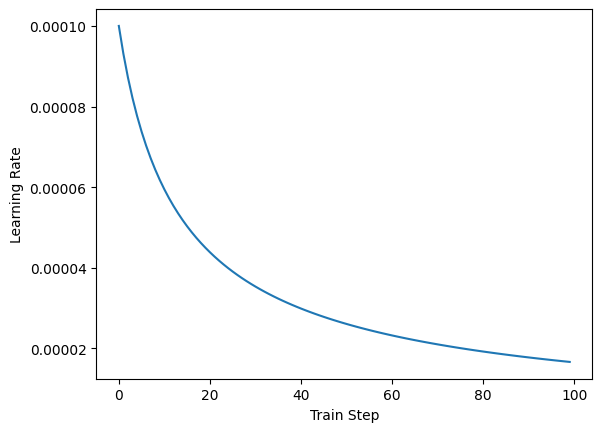

In [52]:
from Models_FC114 import MyDecay
import matplotlib.pyplot as plt

learning_rate = MyDecay(100,0.01)

plt.plot(learning_rate(tf.range(100, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [48]:
i = 1
f = 100
print(i/f)

0.01


In [43]:
import os
print(os.getenv("HOME"))

None


In [3]:
segmentation_history = {}
discriminator_history = {}

segmentation_history["loss"] = []
segmentation_history["accuracy"] = []
segmentation_history["val_loss"] = []
segmentation_history["val_accuracy"] = []

segmentation_history["loss"].append(3)
segmentation_history["loss"].append(4)

print(segmentation_history["loss"])

[3, 4]


In [13]:
import tensorflow as tf

x = tf.constant(2.12)

print(x.shape)

inputs = tf.random.normal(shape=(1,))

print(inputs.shape)

tf.print(inputs)

l = 2.12
l_vector = np.full((8, 1), l, dtype = 'float32')

print(l_vector)

()
(1,)
[0.636279106]
[[2.12]
 [2.12]
 [2.12]
 [2.12]
 [2.12]
 [2.12]
 [2.12]
 [2.12]]


In [3]:
import numpy as np

size_tr_t = 20

index_tr_t = np.arange(size_tr_t)

print(index_tr_t)

np.random.shuffle(index_tr_t)

print(index_tr_t)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 9 19 10 12  4 11  8  5  2  6 14  3  1 13  0  7 18 17 16 15]


In [14]:
import numpy as np

a3 = np.array([[[10, 11, 12], [13, 14, 15], [16, 17, 18]],
               [[20, 21, 22], [23, 24, 25], [26, 27, 28]],
               [[30, 31, 32], [33, 34, 35], [36, 37, 38]]
               ])

print(a3)


print("********************************")
indxs = np.arange(3)
np.random.shuffle(indxs)

print(a3[indxs])

[[[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[20 21 22]
  [23 24 25]
  [26 27 28]]

 [[30 31 32]
  [33 34 35]
  [36 37 38]]]
********************************
[[[30 31 32]
  [33 34 35]
  [36 37 38]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[20 21 22]
  [23 24 25]
  [26 27 28]]]


In [69]:
import layers
import tensorflow as tf

p1 = tf.constant([[1.0, 2.0], [3.0, 4.0]])
p2 = tf.constant(2.)

grl = layers.GradientReversalLayer()

with tf.GradientTape(persistent = True) as tape:
    tape.watch(p1)
    tape.watch(p2)
    x = tf.multiply(p1,p2)
    x1 = grl([x, 0.])
dy_dx = tape.gradient(x, p1)
dy_dx1 = tape.gradient(x1, p1)
print(x1)
print(dy_dx)
print(dy_dx1)

tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0. -0.]
 [-0. -0.]], shape=(2, 2), dtype=float32)


In [43]:
import numpy as np

x = np.full((12,1),3)
print(x)

y = tf.keras.utils.to_categorical(x, 4)

print(y.shape)
print(y)

[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
(12, 4)
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [1]:
import tensorflow as tf
from da_model import DomainAdaptationModel
from Networks import DeepLabV3Plus
import argparse
from discriminators import Domain_Regressor_FullyConnected

tf.random.set_seed(1234)
#x_input = tf.random.normal(shape=input_shape,seed=1234)
x_input = tf.random.uniform(shape=(32, 64, 64, 14),minval=0,maxval=255,dtype=tf.dtypes.int32,seed=1234)
print(x_input[0,0,0])

input_shape = (64, 64, 14)

parser = argparse.ArgumentParser()
args = parser.parse_args(args=[])

args.backbone = 'xception'
args.aspp_rates = (1, 2, 3)
args.data_format = 'channel_last'
args.bn_decay = 0.9997
args.num_classes = 2
args.patches_dimension = 64

deepLab = DeepLabV3Plus(args)

input_block = tf.keras.layers.Input(shape = (64, 64, 14))

Encoder_Outputs, low_Level_Features = deepLab.build_DeepLab_Encoder(input_block)
encoder_model = tf.keras.Model(inputs = input_block, outputs = [Encoder_Outputs, low_Level_Features], name = 'deeplabv3plus_encoder')

pred_encoder,low_lvl_features =  encoder_model(x_input,training=True)

Decoder_Outputs = deepLab.build_DeepLab_Decoder([Encoder_Outputs, low_Level_Features])            
decoder_model = tf.keras.Model(inputs = [Encoder_Outputs,low_Level_Features], outputs = Decoder_Outputs, name = 'deeplabv3plus_decoder')

discriminator_model = Domain_Regressor_FullyConnected(input_shape=Encoder_Outputs.shape[1:],units=1024, num_targets=2)

empty_model = DomainAdaptationModel(input_shape, encoder_model,decoder_model, discriminator_model)

inputs = [x_input,0.12]
y_pred_segmentation = empty_model.main_network(x_input,training=True) 
_,logits_discriminator = empty_model.domain_regressor_network(inputs,training=True)

tf.Tensor([230  81  38  61 155 209 130 136 136 203  91  29 123 192], shape=(14,), dtype=int32)
-------------------------------------
Initializing DeepLab V3+ Architecture
-------------------------------------
Building backbone architecture...
Domain_Regressor_FullyConnected - input_shape: (8, 8, 256)


In [2]:
print(x_input[0][0][1])

print(pred_encoder.shape)
print(pred_encoder[0][0][0][0:10])

print(low_lvl_features.shape)
print(low_lvl_features[0][0][0])

print(y_pred_segmentation.shape)
print(y_pred_segmentation[0][0][0][0])

print(logits_discriminator.shape)
print(logits_discriminator[0])


tf.Tensor([254  45 228 145 208 104  70 224 244  74 228 177 151 169], shape=(14,), dtype=int32)
(32, 8, 8, 256)
tf.Tensor(
[ 1.0624343  -0.2623397   0.04707399  0.62520576  0.40033183 -0.34842038
  0.54275763  0.30709755  0.17659386 -0.33008772], shape=(10,), dtype=float32)
(32, 8, 8, 48)
tf.Tensor(
[-0.6114842   0.09158675  0.7982623  -0.09963354 -0.05580696 -0.32218447
 -0.28249383 -0.24349701  0.27705523 -1.3002332  -0.7107294   1.1154734
  0.19985676  0.49019092  0.49700725 -0.04822665 -0.38800943  0.7977588
 -0.3877328  -0.32115796  0.16113925  0.9677533  -0.84826195  0.7450104
  0.5909193   1.0495753  -0.26633283  0.49022397  0.40128437 -0.0956689
 -0.05142526  0.8271505   1.4529542   0.43906838  1.1190537  -0.7283618
  1.935923   -1.3964113   0.10384487 -0.06428712 -0.9159322  -0.08050237
 -0.24532683 -0.24394187 -0.6880934  -0.4683891  -0.26430663  0.28668436], shape=(48,), dtype=float32)
(32, 64, 64, 2)
tf.Tensor(0.72001845, shape=(), dtype=float32)
(32, 2)
tf.Tensor([-0.769218

In [192]:
print(pred_encoder.shape)
print(pred_encoder[0][0][0][0])

print(low_lvl_features.shape)
print(low_lvl_features[0][0][0][0])

print(y_pred_segmentation.shape)
print(y_pred_segmentation[0][0][0][0])

print(logits_discriminator.shape)
print(logits_discriminator[0])


(32, 8, 8, 256)
tf.Tensor(1.0624343, shape=(), dtype=float32)
(32, 8, 8, 48)
tf.Tensor(-0.6114842, shape=(), dtype=float32)
(32, 64, 64, 2)
tf.Tensor(0.72001845, shape=(), dtype=float32)
(32, 2)
tf.Tensor([-0.7692189   0.94821715], shape=(2,), dtype=float32)


In [5]:
import tensorflow as tf

input_shape = (2, 3)

x1 = tf.random.uniform(shape=input_shape,minval=0,maxval=10,dtype=tf.dtypes.int32,seed=1234)
x2 = tf.random.uniform(shape=input_shape,minval=0,maxval=10,dtype=tf.dtypes.int32,seed=1234)
print(x1)
print(x2)


y = tf.keras.layers.Add()([x1, x2])
print(y)

y1 = tf.math.add(x1,x2)
print(y1)

activation_function = "None"
print(activation_function.casefold() != "none")

tf.Tensor(
[[3 3 0]
 [4 5 1]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[8 8 6]
 [0 1 5]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[11 11  6]
 [ 4  6  6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[11 11  6]
 [ 4  6  6]], shape=(2, 3), dtype=int32)
False


In [63]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(1234)
x_input = tf.random.normal(shape=(10, 8, 8, 256),seed=1234)
low_Level_Features = tf.random.normal(shape=(10, 8, 8, 48),seed=12345)

inputs = [x_input,low_Level_Features]

encoder_layer, low_Level_Features = inputs

layer = encoder_layer

low_level_features_size = low_Level_Features.shape[1:3]
layer = ReshapeTensor(low_level_features_size)(layer)
layer = tf.keras.layers.Concatenate(axis=3)([layer,low_Level_Features]) 

print(layer.shape)
print(layer[0][0][0][0:10])

(10, 8, 8, 304)
tf.Tensor(
[-0.12297685 -0.76935077 -0.13165176  0.08304895 -3.0015008   0.7919887
  1.4807634  -1.4072733  -0.77743167 -1.3099809 ], shape=(10,), dtype=float32)


In [7]:
result_path = []

main_path = "../results/results_avg/"


#X = RO, Y = RO
result_path.append(main_path + 'results_tr_Amazon_PA_classification_S_Amazon_PA_T_Amazon_RO/')

#X = RO->PA, Y = RO
result_path.append(main_path + 'results_tr_Amazon_PA_classification_S_Amazon_PA_T_Cerrado_MA/')

#X = RO->MA, Y = RO
result_path.append(main_path + 'results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Cerrado_MA/')

#X = PA, Y = RO
result_path.append(main_path + 'results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Amazon_PA/')
#X = MA, Y = RO
result_path.append(main_path + 'results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Amazon_RO/')

#for i in range(0, len(result_path), 4):
#results_folders = result_path[i : i + 4]
results_folders = result_path

#print("For 1: " + result_path[i])

for rf in range(len(results_folders)):     

    print("For 2: " + results_folders[rf])

    folder_i = os.listdir(results_folders[rf])
    for i in range(len(folder_i)):
        print("For 3: " + folder_i[i])




For 2: ../results/results_avg/results_tr_Amazon_PA_classification_S_Amazon_PA_T_Amazon_RO/
For 3: Avg_Scores
For 2: ../results/results_avg/results_tr_Amazon_PA_classification_S_Amazon_PA_T_Cerrado_MA/
For 3: Avg_Scores
For 2: ../results/results_avg/results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Cerrado_MA/
For 3: Avg_Scores
For 2: ../results/results_avg/results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Amazon_PA/
For 3: Avg_Scores
For 2: ../results/results_avg/results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Amazon_RO/
For 3: Avg_Scores


In [9]:
'DR' in "DRCL"

True